In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# Check for null values
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3901 non-null   int64  
 1   trans_date_trans_time  3901 non-null   object 
 2   cc_num                 3901 non-null   int64  
 3   merchant               3901 non-null   object 
 4   category               3901 non-null   object 
 5   amt                    3901 non-null   float64
 6   first                  3901 non-null   object 
 7   last                   3901 non-null   object 
 8   gender                 3901 non-null   object 
 9   street                 3901 non-null   object 
 10  city                   3901 non-null   object 
 11  state                  3901 non-null   object 
 12  zip                    3901 non-null   int64  
 13  lat                    3901 non-null   float64
 14  long                   3901 non-null   object 
 15  city

In [7]:
# Check for null values

test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [8]:
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.436,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0


In [9]:
# Combin both data

data = pd.concat([train_data,test_data])

In [10]:
data.shape

(1300576, 23)

In [11]:
# Let us check how each feature is correlated with the target feature
corr_result = {}
for col in data.columns:
    if data[col].dtype != 'object' and col != 'is_fraud':
        corr = data[col].corr(data['is_fraud'])
        corr_result[col] = corr
corr_result

{'Unnamed: 0': -0.004660916738186176,
 'cc_num': -0.0010325653663485884,
 'amt': 0.21956090757669197,
 'zip': -0.002103154038162285,
 'lat': 0.0016475132011873929,
 'city_pop': 0.002100958330793882,
 'unix_time': -0.005129314930532913,
 'merch_lat': 0.0015013246086356571,
 'merch_long': 0.0017320144066792253}

In [12]:
# Consider only columns necessary for prediction

data.drop(columns=['Unnamed: 0','trans_date_trans_time','first','last','gender','street','job','dob','trans_num'],inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300576 entries, 0 to 3900
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1300576 non-null  int64  
 1   merchant    1300576 non-null  object 
 2   category    1300576 non-null  object 
 3   amt         1300576 non-null  float64
 4   city        1300576 non-null  object 
 5   state       1300576 non-null  object 
 6   zip         1300576 non-null  int64  
 7   lat         1300576 non-null  float64
 8   long        1300576 non-null  object 
 9   city_pop    1300575 non-null  float64
 10  unix_time   1300575 non-null  float64
 11  merch_lat   1300575 non-null  float64
 12  merch_long  1300575 non-null  float64
 13  is_fraud    1300575 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 148.8+ MB


In [14]:
# Check class distribution

data['is_fraud'].value_counts()

is_fraud
0.0    1293051
1.0       7524
Name: count, dtype: int64

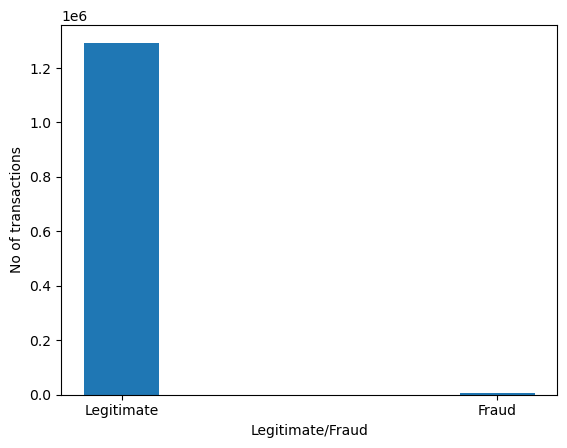

In [17]:
# plotting bar chart
fraud_counts = data['is_fraud'].value_counts()  
categories = fraud_counts.index 
plt.bar(categories, fraud_counts, width=0.2)
plt.xlabel('Legitimate/Fraud')
plt.ylabel('No of transactions')
plt.xticks(categories, labels=['Legitimate', 'Fraud'])  
plt.show()

In [18]:
# Separate fraud & legitimate transactions

legitimate = data[data['is_fraud'] == 0]
fraud = data[data['is_fraud'] == 1]

In [19]:
# consider only a sample of legitimate transactions
legitimate = legitimate.sample(n = len(fraud))
legitimate.shape

(7524, 14)

In [20]:
# same no of legitimate & fraud transactions
fraud.shape

(7524, 14)

In [21]:
# Combine the data
data = pd.concat([legitimate,fraud])

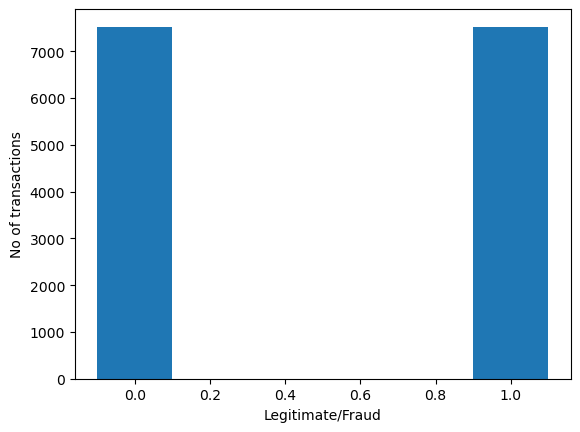

In [22]:
# Check class distribution
plt.bar(data['is_fraud'].unique(),data['is_fraud'].value_counts(),width = 0.2)
plt.xlabel('Legitimate/Fraud')
plt.ylabel('No of transactions')
plt.show()

In [23]:
# Encoding categorical data
le = LabelEncoder()
data['merchant'] = le.fit_transform(data['merchant'])
data['category'] = le.fit_transform(data['category'])
data['city'] = le.fit_transform(data['city'])
data['state'] = le.fit_transform(data['state'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15048 entries, 1291794 to 2650
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      15048 non-null  int64  
 1   merchant    15048 non-null  int32  
 2   category    15048 non-null  int32  
 3   amt         15048 non-null  float64
 4   city        15048 non-null  int32  
 5   state       15048 non-null  int32  
 6   zip         15048 non-null  int64  
 7   lat         15048 non-null  float64
 8   long        15048 non-null  object 
 9   city_pop    15048 non-null  float64
 10  unix_time   15048 non-null  float64
 11  merch_lat   15048 non-null  float64
 12  merch_long  15048 non-null  float64
 13  is_fraud    15048 non-null  float64
dtypes: float64(7), int32(4), int64(2), object(1)
memory usage: 1.5+ MB


In [25]:
# Separating the target feature
x_data = data.iloc[:,:-1].values
y_data = data.iloc[:,-1].values

In [26]:
# Split the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42,shuffle=True)

In [27]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [28]:
log_pred = log_reg.predict(x_train)
print("Accuracy score: ",round(accuracy_score(y_train,log_pred),3))
print("Classification report:\n",classification_report(y_train,log_pred))

Accuracy score:  0.501
Classification report:
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      5279
         1.0       0.00      0.00      0.00      5254

    accuracy                           0.50     10533
   macro avg       0.25      0.50      0.33     10533
weighted avg       0.25      0.50      0.33     10533



In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
dt_pred = dt.predict(x_train)
print("Accuracy score: ",round(accuracy_score(y_train,dt_pred),3))
print("Classification report:\n",classification_report(y_train,dt_pred))

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5279
         1.0       1.00      1.00      1.00      5254

    accuracy                           1.00     10533
   macro avg       1.00      1.00      1.00     10533
weighted avg       1.00      1.00      1.00     10533



In [32]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [33]:
rfc_pred = rfc.predict(x_train)
print("Accuracy score: ",round(accuracy_score(y_train,rfc_pred),3))
print("Classification report:\n",classification_report(y_train,rfc_pred))

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5279
         1.0       1.00      1.00      1.00      5254

    accuracy                           1.00     10533
   macro avg       1.00      1.00      1.00     10533
weighted avg       1.00      1.00      1.00     10533



In [34]:
test_pred = log_reg.predict(x_test)
print("Accuracy score: ",round(accuracy_score(y_test,test_pred),3))
print("Classification report:\n",classification_report(y_test,test_pred))

Accuracy score:  0.497
Classification report:
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.66      2245
         1.0       0.00      0.00      0.00      2270

    accuracy                           0.50      4515
   macro avg       0.25      0.50      0.33      4515
weighted avg       0.25      0.50      0.33      4515

